# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

Описание данных:
1. airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
2. balcony — число балконов
3. ceiling_height — высота потолков (м)
4. cityCenters_nearest — расстояние до центра города (м)
5. days_exposition — сколько дней было размещено объявление (от публикации до снятия)
6. first_day_exposition — дата публикации
7. floor — этаж
8. floors_total — всего этажей в доме
9. is_apartment — апартаменты (булев тип)
10. kitchen_area — площадь кухни в квадратных метрах (м²)
11. last_price — цена на момент снятия с публикации
12. living_area — жилая площадь в квадратных метрах (м²)
13. locality_name — название населённого пункта
14. open_plan — свободная планировка (булев тип)
15. parks_around3000 — число парков в радиусе 3 км
16. parks_nearest — расстояние до ближайшего парка (м)
17. ponds_around3000 — число водоёмов в радиусе 3 км
18. ponds_nearest — расстояние до ближайшего водоёма (м)
19. rooms — число комнат
20. studio — квартира-студия (булев тип)
21. total_area — общая площадь квартиры в квадратных метрах (м²)
22. total_images — число фотографий квартиры в объявлении

План работы:
1. Открываем файл с данными и изучаем общую информацию
2. Проводим предобработку данных
3. Добавляем в таблицу новые столбцы с необходимыми для дальнейшей работы параметрами:
4. Проводим исследовательский анализ данных
5. Пишите общий вывод по проделланой работе

### Изучение общей информации 

In [63]:
import pandas as pd
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
#выводим и просмариваем первые строки датафрейма
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [64]:
#просматриваем информацию о файле, какой у каждого столбца тип данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Замечаем, что floors_total типа float64 - можно заменить на int64, тк число этажей не может быть вещественным
Замечаем, что is_apartment не типа bool, а также first_day_exposition не типа datetime64
Замечаем, что balcony типа float64 - можно заменить на int64, тк число балконов не может быть вещественным
Также можно заменить на int64 parks_around3000, ponds_around3000 и days_exposition

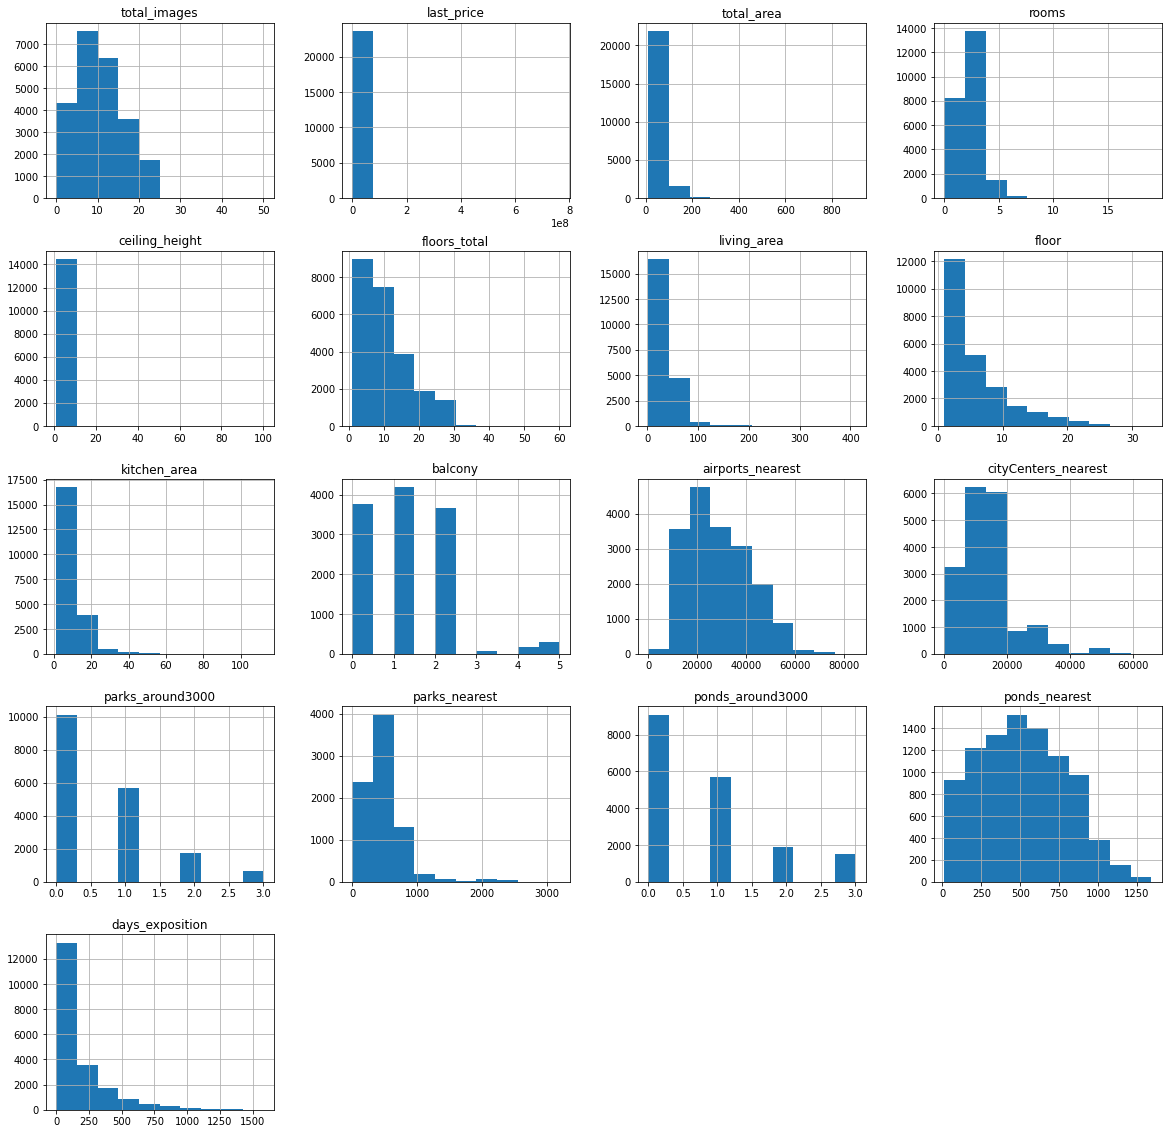

In [65]:
#построим гистограммы размером 20*20 по каждому столбцу датафрейма
import matplotlib.pyplot as plt
data.hist(figsize = (20, 20))
plt.show()

Можно заметить следующие анамальные значения: 
- высота потолков (ceiling_height) от 1 м до 100 м
- жилую площадь (living_area) от 2 квадратных метров
- площадь кухни (kitchen_area) от 1,5 квадратных метра

Также можно увидеть, что максимальное число этажей в доме (floors_total) - 60, но максимальный этаж (floor) - лишь 33;
Число комнат (rooms) - более чем 15, кухня площадью 100 квадратных метров (kitchen_area), 5 балконов (balcony) и жилая площадь (living_area) 400 квадратных метров немного "выбиваются" из общей картины 

In [66]:
#проверим наличие явных дубликатов в data
data.duplicated().sum()

0

Неявных дубликатов в датафрейме нет

### Предобработка данных

In [67]:
#почтитаем сумму пропущенных значений по кажому столбцу датафрейма
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [68]:
#пропуки в balcony, parks_around3000 и ponds_around3000 можно заменить заменить на 0, тк они были сдлеаны из-за полного 
#отсутствия в квартире балконов, а также парков и водоемов в радиусе 3 км от дома, в котором располагается квартира
for column in ['balcony', 'parks_around3000', 'ponds_around3000']:
    data[column] = data[column].fillna(0)
#проверяем, что число пропусков стало 0
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
dtype: int64

Число пропусков в balcony, parks_around3000, ponds_around3000 действительно стало 0. Переходим к locality_name

In [69]:
#выведем уникальные значения в столбце locality_name и их общее количество
print(data['locality_name'].sort_values().unique())
len(data['locality_name'].unique())

['Бокситогорск' 'Волосово' 'Волхов' 'Всеволожск' 'Выборг' 'Высоцк'
 'Гатчина' 'Зеленогорск' 'Ивангород' 'Каменногорск' 'Кингисепп' 'Кириши'
 'Кировск' 'Колпино' 'Коммунар' 'Красное Село' 'Кронштадт' 'Кудрово'
 'Лодейное Поле' 'Ломоносов' 'Луга' 'Любань' 'Мурино' 'Никольское'
 'Новая Ладога' 'Отрадное' 'Павловск' 'Петергоф' 'Пикалёво' 'Подпорожье'
 'Приморск' 'Приозерск' 'Пушкин' 'Санкт-Петербург' 'Светогорск'
 'Сертолово' 'Сестрорецк' 'Сланцы' 'Сосновый Бор' 'Сясьстрой' 'Тихвин'
 'Тосно' 'Шлиссельбург' 'городской поселок Большая Ижора'
 'городской поселок Янино-1' 'городской посёлок Будогощь'
 'городской посёлок Виллози' 'городской посёлок Лесогорский'
 'городской посёлок Мга' 'городской посёлок Назия'
 'городской посёлок Новоселье' 'городской посёлок Павлово'
 'городской посёлок Рощино' 'городской посёлок Свирьстрой'
 'городской посёлок Советский' 'городской посёлок Фёдоровское'
 'городской посёлок Янино-1' 'деревня Агалатово' 'деревня Аро'
 'деревня Батово' 'деревня Бегуницы' 'деревн

365

Изучив уникальные значения в столбце с названиями населённых пунктов увидели неявные дубликаты: поселок Рябово и поселок городского типа Рябово, городской поселок Янино-1 и городской посёлок Янино-1 — это одни и тех же населённые пункты. Уникальных значений - 365

In [70]:
#заменим букву ё на е и городской поселок на поселок городского типа 
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')
data['locality_name'] = data['locality_name'].str.replace('городской поселок', 'поселок городского типа')
#выведем вновь уникальные значения и их количество
print(data['locality_name'].sort_values().unique())
len(data['locality_name'].unique())

['Бокситогорск' 'Волосово' 'Волхов' 'Всеволожск' 'Выборг' 'Высоцк'
 'Гатчина' 'Зеленогорск' 'Ивангород' 'Каменногорск' 'Кингисепп' 'Кириши'
 'Кировск' 'Колпино' 'Коммунар' 'Красное Село' 'Кронштадт' 'Кудрово'
 'Лодейное Поле' 'Ломоносов' 'Луга' 'Любань' 'Мурино' 'Никольское'
 'Новая Ладога' 'Отрадное' 'Павловск' 'Петергоф' 'Пикалево' 'Подпорожье'
 'Приморск' 'Приозерск' 'Пушкин' 'Санкт-Петербург' 'Светогорск'
 'Сертолово' 'Сестрорецк' 'Сланцы' 'Сосновый Бор' 'Сясьстрой' 'Тихвин'
 'Тосно' 'Шлиссельбург' 'деревня Агалатово' 'деревня Аро' 'деревня Батово'
 'деревня Бегуницы' 'деревня Белогорка' 'деревня Большая Вруда'
 'деревня Большая Пустомержа' 'деревня Большие Колпаны'
 'деревня Большое Рейзино' 'деревня Большой Сабск' 'деревня Бор'
 'деревня Борисова Грива' 'деревня Ваганово' 'деревня Вартемяги'
 'деревня Вахнова Кара' 'деревня Выскатка' 'деревня Гарболово'
 'деревня Глинка' 'деревня Горбунки' 'деревня Гостилицы'
 'деревня Заклинье' 'деревня Заневка' 'деревня Зимитицы' 'деревня Извар

324

In [71]:
#уникальные значения уменьшились, чтобы еще сократить число таких значений приведем все к нижнему регистру и подсчитаем вновь
len(data['locality_name'].str.lower().unique())

324

Никаких изменений не произошло. Удалим пропуски, так как с ними остальные данные теряют какой либо смысл

In [72]:
#удаляем пропуски
data = data.dropna(subset = ['locality_name']).reset_index(drop = True)
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9160
floors_total               85
living_area              1898
floor                       0
is_apartment            20890
studio                      0
open_plan                   0
kitchen_area             2269
balcony                     0
locality_name               0
airports_nearest         5534
cityCenters_nearest      5511
parks_around3000            0
parks_nearest           15586
ponds_around3000            0
ponds_nearest           14565
days_exposition          3180
dtype: int64

Переходим к is_apartment

In [73]:
#просмотрим уникальные значения столбца is_apartment
data['is_apartment'].unique()

array([nan, False, True], dtype=object)

In [74]:
#заменим пустые значения на False
data['is_apartment'] = data['is_apartment'].fillna(False)
#просмтрим вновь уникальные значения
print(data['is_apartment'].unique())
#проверяем, что пропусков стало 0
data.isna().sum()

[False  True]


total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9160
floors_total               85
living_area              1898
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2269
balcony                     0
locality_name               0
airports_nearest         5534
cityCenters_nearest      5511
parks_around3000            0
parks_nearest           15586
ponds_around3000            0
ponds_nearest           14565
days_exposition          3180
dtype: int64

Число пропусков в is_apartment действительно стало 0

In [75]:
#преобразуем тип данных в столбцах, которые указывали ранее, в 1 пункте
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')
#тк при изменении типа данных у days_exposition выходила ошибка - применим округление 
data['days_exposition'] = data['days_exposition'].round()
for column in ['floors_total', 'parks_around3000', 'ponds_around3000', 'balcony', 'days_exposition']:
    data[column] = data[column].astype('Int64')
data['is_apartment'] = data['is_apartment'].astype('bool')
#проверим, что тип данных изменился
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23650 entries, 0 to 23649
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int64         
 1   last_price            23650 non-null  float64       
 2   total_area            23650 non-null  float64       
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int64         
 5   ceiling_height        14490 non-null  float64       
 6   floors_total          23565 non-null  Int64         
 7   living_area           21752 non-null  float64       
 8   floor                 23650 non-null  int64         
 9   is_apartment          23650 non-null  bool          
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  kitchen_area          21381 non-null  float64       
 13  balcony         

Все необходимые изменения типа данных были успешно выполнены.
Далее продолжаем работать с пропусками

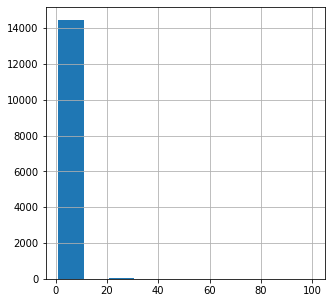

In [76]:
#просмотрим анамальные знаячения в ceiling_height
data['ceiling_height'].hist(figsize = (5, 5))
plt.show()

In [77]:
#выведем уникальные значения в столбце ceiling_height
data['ceiling_height'].sort_values().unique()

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,
         3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,
         3.42,   3.43,   3.44,   3.45,   3.46,   3.47,   3.48,   3.49,
      

Заметим аномально высокие значения 8, 10, 14, 20, 100 метров

In [78]:
#выведем количество аномальных значений, превышающих 8
len(data.loc[data['ceiling_height'] >= 8.0])

29

In [79]:
#таких аномалий всего 29 - скорее всего, запятая была поставлена не туда и это можно исправить, разделив такое значение на 10
data.loc[data['ceiling_height'] >= 8.0, 'ceiling_height'] = data['ceiling_height'] / 10
#проверим вновь уникальные значения столбца
data['ceiling_height'].sort_values().unique()

array([ 0.8 ,  0.83,  1.  ,  1.03,  1.2 ,  1.4 ,  1.75,  2.  ,  2.2 ,
        2.25,  2.26,  2.3 ,  2.34,  2.4 ,  2.45,  2.46,  2.47,  2.48,
        2.49,  2.5 ,  2.51,  2.52,  2.53,  2.54,  2.55,  2.56,  2.57,
        2.58,  2.59,  2.6 ,  2.61,  2.62,  2.63,  2.64,  2.65,  2.66,
        2.67,  2.68,  2.69,  2.7 ,  2.71,  2.72,  2.73,  2.74,  2.75,
        2.76,  2.77,  2.78,  2.79,  2.8 ,  2.81,  2.82,  2.83,  2.84,
        2.85,  2.86,  2.87,  2.88,  2.89,  2.9 ,  2.91,  2.92,  2.93,
        2.94,  2.95,  2.96,  2.97,  2.98,  2.99,  3.  ,  3.01,  3.02,
        3.03,  3.04,  3.05,  3.06,  3.07,  3.08,  3.09,  3.1 ,  3.11,
        3.12,  3.13,  3.14,  3.15,  3.16,  3.17,  3.18,  3.2 ,  3.21,
        3.22,  3.23,  3.24,  3.25,  3.26,  3.27,  3.28,  3.29,  3.3 ,
        3.31,  3.32,  3.33,  3.34,  3.35,  3.36,  3.37,  3.38,  3.39,
        3.4 ,  3.42,  3.43,  3.44,  3.45,  3.46,  3.47,  3.48,  3.49,
        3.5 ,  3.51,  3.52,  3.53,  3.54,  3.55,  3.56,  3.57,  3.58,
        3.59,  3.6 ,

Отлично, уникальные значения выглядят более правдопободобно, однако маловероятно, что существуют квартиры с высотой потолка до 2 метров или больше 3.5 метров
Следующий шаг заполнение пустых значений.

In [80]:
#выводим статистические данные по столбцу ceiling_height
data['ceiling_height'].describe()

count    14490.000000
mean         2.725840
std          0.287949
min          0.800000
25%          2.510000
50%          2.650000
75%          2.800000
max         10.000000
Name: ceiling_height, dtype: float64

По этим данным можно сделать вывод, что большинство квартир с высотой потолков 2.5 - 2.8
Попробуем вывести статистические данные, отфильтровав высоту потолков от 2 до 5 метров и заменив высоту потолка до 2 и от 5 метров на полученную ранее медиану - 2.65

In [81]:
data.loc[data['ceiling_height'] < 2.0, 'ceiling_height'] = data['ceiling_height'].median()
data.loc[data['ceiling_height'] > 5, 'ceiling_height'] = data['ceiling_height'].median()
data['ceiling_height'].describe()

count    14490.000000
mean         2.724925
std          0.271423
min          2.000000
25%          2.510000
50%          2.650000
75%          2.800000
max          5.000000
Name: ceiling_height, dtype: float64

Заметим, что медиана и среднее практически не изменили значений и поэтому заменим все пустые значения на медиану (удалить строки с пустым значением не получится - так как из 24.000 останется лишь 14.000, а это довольно большое сокращение)

In [82]:
#заменяем все пустые значения на медиану
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
#выведем сумму пропущенных значений по кажому столбцу датафрейма для проверки
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               85
living_area              1898
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2269
balcony                     0
locality_name               0
airports_nearest         5534
cityCenters_nearest      5511
parks_around3000            0
parks_nearest           15586
ponds_around3000            0
ponds_nearest           14565
days_exposition          3180
dtype: int64

Пропусков в ceiling_height больше нет. Переходим к total_area

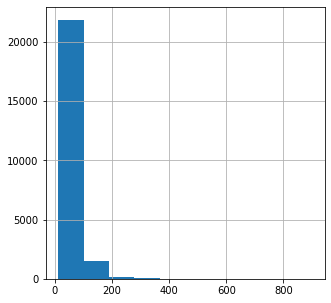

In [83]:
#просмотрим аномальные знаячения в total_area
data['total_area'].hist(figsize = (5, 5))
plt.show()

In [84]:
#выведем уникальные значения в столбце total_area
data['total_area'].sort_values().unique()

array([ 12. ,  13. ,  13.2, ..., 631. , 631.2, 900. ])

In [85]:
#посмотрим статистические данные по этому столбцу, несмотря на аномалии
data['total_area'].describe()

count    23650.000000
mean        60.329069
std         35.661808
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

In [86]:
#обращая внимание на график, выведем количество аномальных значений, менее 15 и превышающих 250
print(len(data.loc[data['total_area'] < 15]), len(data.loc[data['total_area'] > 250]))
#попробуем вывести статистические данные, откинув аномальные значения до 15 и сверх 250
filtered_total_area = data.query('15.0 < total_area < 250.0')
filtered_total_area['total_area'].describe()

6 112


count    23526.000000
mean        58.948519
std         28.775081
min         15.500000
25%         40.000000
50%         52.000000
75%         69.000000
max        249.900000
Name: total_area, dtype: float64

Медиана и среднее практически не изменились и аномальных значений не много, значит заменяем их на медиану и перепроверяем

In [87]:
#заменяем их на медиану
data.loc[data['total_area'] < 15, 'total_area'] = data['total_area'].median()
data.loc[data['total_area'] > 250, 'total_area'] = data['total_area'].median()
#выводим статистические данные по столбцу total_area 
data['total_area'].describe()

count    23650.000000
mean        58.942447
std         28.813915
min         15.000000
25%         40.000000
50%         52.000000
75%         69.000000
max        250.000000
Name: total_area, dtype: float64

Отличные статистические данные. Далее переходим к living_area.

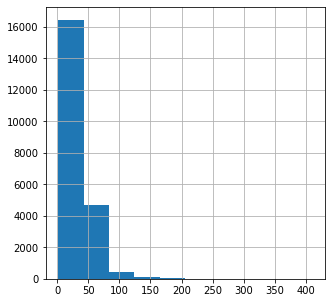

In [88]:
#просмотрим анамальные знаячения в living_area
data['living_area'].hist(figsize = (5, 5))
plt.show()

In [89]:
#выведем уникальные значения в столбце living_area
print(data['living_area'].sort_values().unique())
#посмотрим статистические данные по этому столбцу, несмотря на аномалии
data['living_area'].describe()

[  2.    3.    5.  ... 409.  409.7   nan]


count    21752.000000
mean        34.448356
std         22.037664
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

In [90]:
#выведем количество аномальных значений, менее 15 и превышающих 170
print(len(data.loc[data['living_area'] < 15]), len(data.loc[data['living_area'] > 170]))
#попробуем вывести статистические данные, откинув аномальные значения до 15 и сверх 170
filtered_living_area = data.query('15.0 < living_area < 170.0')
filtered_living_area['living_area'].describe()

704 70


count    20664.000000
mean        34.829972
std         19.005360
min         15.010000
25%         19.800000
50%         30.700000
75%         43.000000
max        168.300000
Name: living_area, dtype: float64

Медиана и среднее практически не изменились и аномальных значений не много, значит заменяем аномальные значений на медиану и перепроверяем (пропуски оставим без изменений ввиду разнообразия квартир и достаточно большого числа пропусков, что может в дальнейшем некорректно сказаться на результатах анализа)

In [91]:
#заменяем на медиану
data.loc[data['living_area'] < 15, 'living_area'] = data['living_area'].median()
data.loc[data['living_area'] > 170, 'living_area'] = data['living_area'].median()
#выводим статистические данные по столбцу total_area 
data['living_area'].describe()

count    21752.000000
mean        34.378979
std         18.715271
min         15.000000
25%         19.600000
50%         30.000000
75%         42.100000
max        170.000000
Name: living_area, dtype: float64

Отличные статистические данные. Далее переходим к kitchen_area

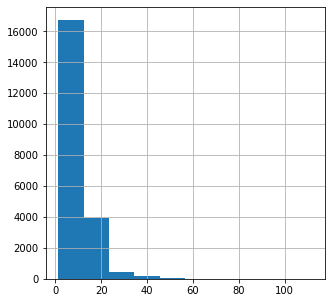

In [92]:
#просмотрим анамальные знаячения в kitchen_area
data['kitchen_area'].hist(figsize = (5, 5))
plt.show()

In [93]:
#выведем уникальные значения в столбце kitchen_area
data['kitchen_area'].sort_values().unique()

array([  1.3 ,   2.  ,   2.3 ,   2.4 ,   2.89,   3.  ,   3.2 ,   3.3 ,
         3.4 ,   3.5 ,   3.7 ,   3.8 ,   4.  ,   4.1 ,   4.2 ,   4.3 ,
         4.4 ,   4.5 ,   4.6 ,   4.7 ,   4.8 ,   4.9 ,   5.  ,   5.04,
         5.06,   5.1 ,   5.14,   5.2 ,   5.21,   5.23,   5.25,   5.28,
         5.29,   5.3 ,   5.31,   5.33,   5.35,   5.4 ,   5.42,   5.44,
         5.47,   5.49,   5.5 ,   5.53,   5.59,   5.6 ,   5.61,   5.62,
         5.64,   5.65,   5.68,   5.7 ,   5.74,   5.75,   5.78,   5.8 ,
         5.82,   5.85,   5.86,   5.9 ,   5.91,   6.  ,   6.02,   6.03,
         6.1 ,   6.16,   6.19,   6.2 ,   6.22,   6.23,   6.24,   6.25,
         6.26,   6.27,   6.28,   6.3 ,   6.31,   6.33,   6.35,   6.36,
         6.37,   6.4 ,   6.47,   6.5 ,   6.55,   6.58,   6.6 ,   6.61,
         6.62,   6.65,   6.7 ,   6.72,   6.73,   6.76,   6.77,   6.8 ,
         6.82,   6.83,   6.84,   6.86,   6.9 ,   6.91,   6.93,   6.95,
         7.  ,   7.02,   7.03,   7.06,   7.09,   7.1 ,   7.12,   7.15,
      

Замечаем аномалии в kitchen_area - свыше 50 квадратных метров

In [94]:
#выводим статистические данные, несмотря на аномалии
data['kitchen_area'].describe()

count    21381.000000
mean        10.566403
std          5.901753
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

In [95]:
#выведем количество аномальных значений,превышающих 50
print(len(data.loc[data['kitchen_area'] > 50]))
#попробуем вывести статистические данные, откинув аномальные значения сверх 50
filtered_kitchen_area = data.query('kitchen_area < 50.0')
filtered_kitchen_area['kitchen_area'].describe()

46


count    21323.000000
mean        10.424230
std          5.178905
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max         49.400000
Name: kitchen_area, dtype: float64

Медиана и среднее практически не изменились и аномальных значений не много, значит заменяем их на медиану и перепроверяем
(пропуски оставим без изменений ввиду разнообразия квартир и достаточно большого числа пропусков, что может в дальнейшем некорректно сказаться на результатах анализа)

In [96]:
#заменяем аномалии на медиану
data.loc[data['kitchen_area'] > 50, 'kitchen_area'] = data['kitchen_area'].median()
#выводим статистические данные по столбцу total_area 
print(data['kitchen_area'].describe())

count    21381.000000
mean        10.443593
std          5.256499
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max         50.000000
Name: kitchen_area, dtype: float64


Отличные статистические данные. Переходим к следующему шагу

### Посчитайте и добавьте в таблицу новые столбцы

In [97]:
#цена одного квадратного метра
data['one_meter_price'] = data['last_price'] / data['total_area']
#день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
data['day_exposition'] = data['first_day_exposition'].dt.weekday
#месяц публикации объявления
data['month_exposition'] = data['first_day_exposition'].dt.month
#год публикации объявления
data['year_exposition'] = data['first_day_exposition'].dt.year
#тип этажа квартиры (значения — «первый», «последний», «другой»)
def floor_type(data):
    try:
        if data['floor'] == 1:
            return 'первый'
        elif data['floor'] == data['floors_total']:
            return 'последний'
        elif 1 < data['floor'] < data['floors_total']:
            return 'другой'
    except:
        pass
data['floor_type'] = data.apply(floor_type, axis = 1)
#расстояние в км до центра города
data['cityCenters_nearest_km'] = data['cityCenters_nearest'] / 1000
#выведем первые 5 строк датафрейма для проверки
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,one_meter_price,day_exposition,month_exposition,year_exposition,floor_type,cityCenters_nearest_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,482.0,2,755.0,<NA>,120370.370370,3,3,2019,другой,16.028
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,NaN,0,NaN,81,82920.792079,1,12,2018,первый,18.603
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,90.0,2,574.0,558,92785.714286,3,8,2015,другой,13.933
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,NaN,9,False,...,84.0,3,234.0,424,408176.100629,4,7,2015,другой,6.800
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,112.0,1,48.0,121,100000.000000,1,6,2018,другой,8.098


### Проведите исследовательский анализ данных

Изучем и опишем следующие параметры (построим гистограммы и выведем статистические данные):

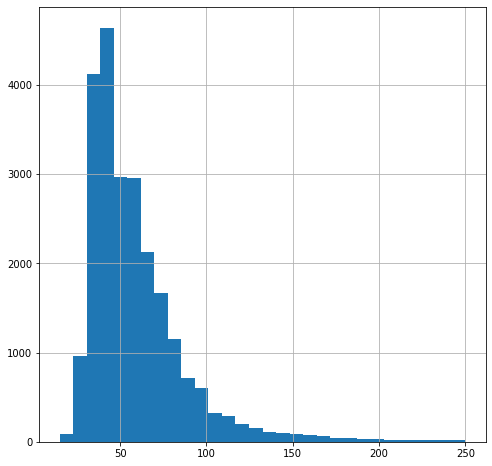

count    23650.000000
mean        58.942447
std         28.813915
min         15.000000
25%         40.000000
50%         52.000000
75%         69.000000
max        250.000000
Name: total_area, dtype: float64

In [98]:
#общая площадь
data['total_area'].hist(figsize = (8, 8), bins = 30, grid = True)
plt.show()
data['total_area'].describe()

Гистограмма имеет вид распределения Пуассона. Среднее значение общей площади жилья составляет 58.9 кв метра и медиана составляет 52 кв метра. В большинстве квартиры имеют общую площадь 40 - 69 кв метров

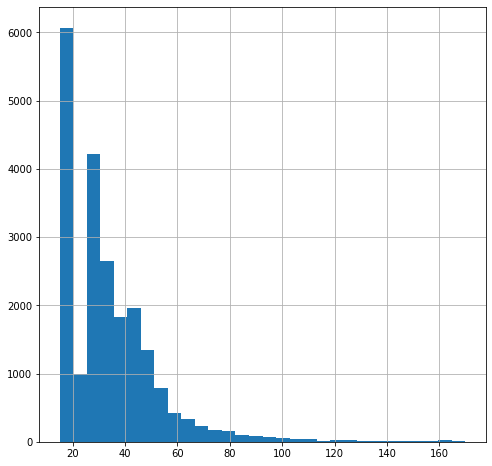

count    21752.000000
mean        34.378979
std         18.715271
min         15.000000
25%         19.600000
50%         30.000000
75%         42.100000
max        170.000000
Name: living_area, dtype: float64

In [99]:
#жилая площадь
data['living_area'].hist(figsize = (8, 8), bins = 30, grid = True)
plt.show()
data['living_area'].describe()

Гистограмма имеет вид распределения Пуассона. Среднее значение жилой площади квартиры составляет 34.4 кв метра и медиана составляет 30 кв метра. В большинстве квартиры имеют жилую площадь 19 - 42 кв метров

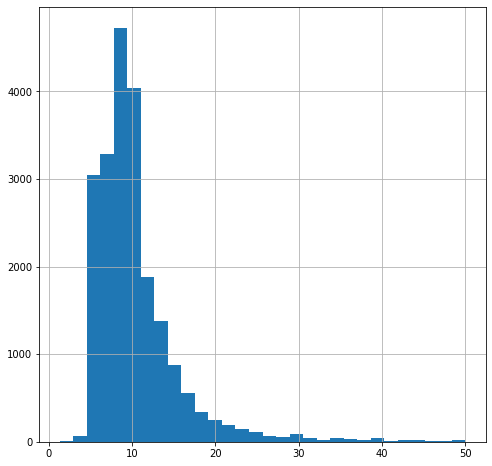

count    21381.000000
mean        10.443593
std          5.256499
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max         50.000000
Name: kitchen_area, dtype: float64

In [100]:
#площадь кухни
data['kitchen_area'].hist(figsize = (8, 8), bins = 30, grid = True)
plt.show()
data['kitchen_area'].describe()

Гистограмма имеет вид распределения Пуассона. Среднее значение площади кухни составляет 10.4 кв метра и медиана составляет 9.1 кв метра. В большинстве квартиры имеют площадь кухни 7 - 12 кв метров

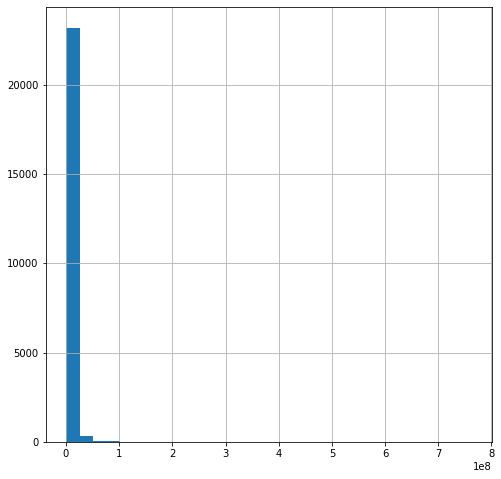

count    2.365000e+04
mean     6.541127e+06
std      1.089640e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [101]:
#цена объекта
data['last_price'].hist(figsize = (8, 8), bins = 30, grid = True)
plt.show()
data['last_price'].describe()

Гистограмма имеет вид распределения Пуассона. Средняя цена квартиры составляет 6.5 млн и медиана составляет 4.65 млн. В большинстве квартиры имеют цену в диапазоне 3.4 - 6.7 млн

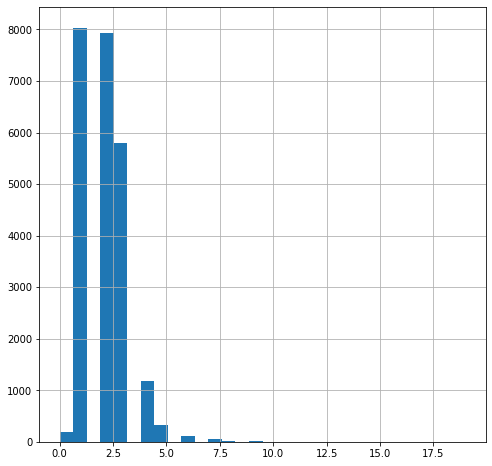

count    23650.000000
mean         2.070106
std          1.078620
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

In [102]:
#количество комнат
data['rooms'].hist(figsize = (8, 8), bins = 30, grid = True)
plt.show()
data['rooms'].describe()

Гистограмма имеет вид распределения Пуассона. Среднее количество комнат в квартирах это 2 комнаты и медиана составляет также 2 комнаты. В большинстве квартиры имеют 1 - 3 комнаты.

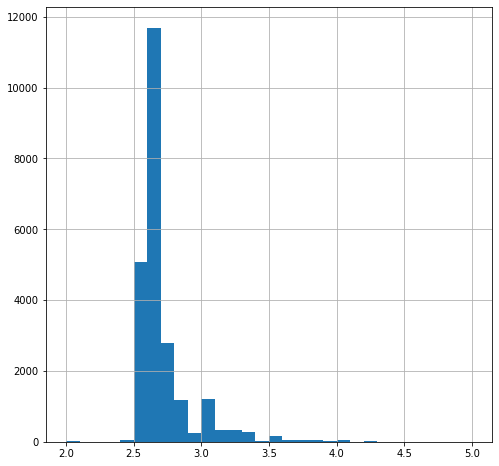

count    23650.000000
mean         2.695905
std          0.215564
min          2.000000
25%          2.600000
50%          2.650000
75%          2.700000
max          5.000000
Name: ceiling_height, dtype: float64

In [103]:
#высота потолков
data['ceiling_height'].hist(figsize = (8, 8), bins = 30, grid = True)
plt.show()
data['ceiling_height'].describe()

Гистограмма имеет вид распределения Пуассона. Средняя высота потолков в квартире - 2.7 метров и медиана составляет чуть меньше 2.65 комнаты. В большинстве квартиры имеют высоту потолков 2.6 - 2.7 метров.

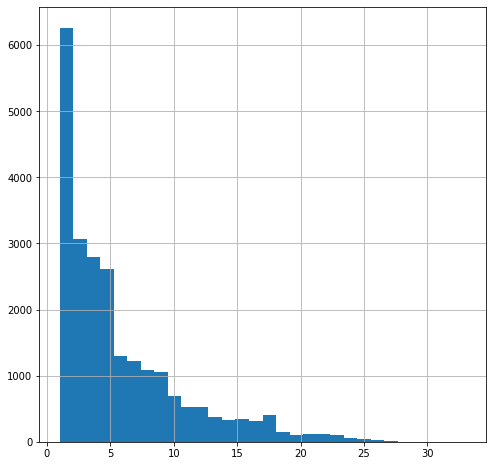

count    23650.000000
mean         5.893277
std          4.883317
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

In [104]:
#этаж квартиры
data['floor'].hist(figsize = (8, 8), bins = 30, grid = True)
plt.show()
data['floor'].describe()

Гистограмма имеет вид распределения Пуассона. Средний этаж представленных квартир - 6, что выше медианы, которая составляет 4. В большинстве квартиры располагаются на  2 - 8 этажах.

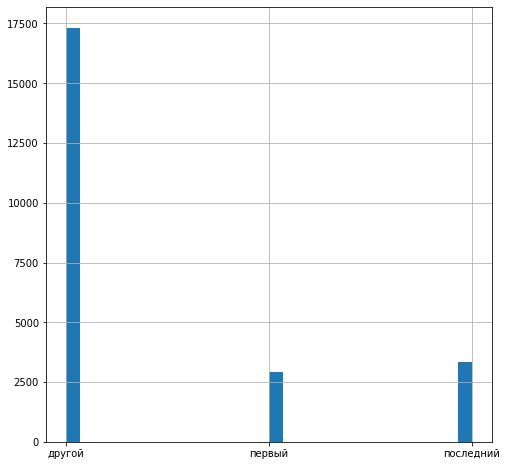

count      23568
unique         3
top       другой
freq       17326
Name: floor_type, dtype: object

In [105]:
#тип этажа квартиры («первый», «последний», «другой»)
data['floor_type'].hist(figsize = (8, 8), bins = 30, grid = True)
plt.show()
data['floor_type'].describe()

Большинство квартир находятся не на 1 или последнем этаже. Однако, на последнем этаже они располагаются чаще, чем на 1.

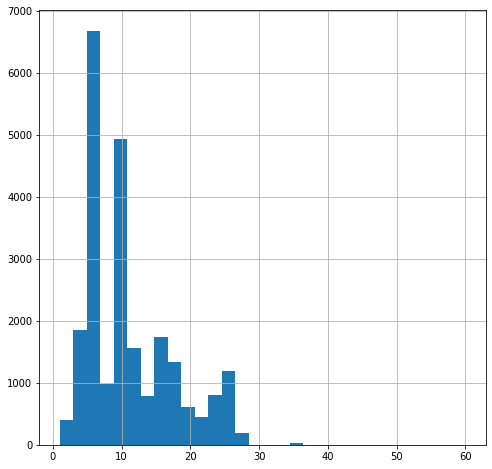

count    23565.000000
mean        10.675875
std          6.594823
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

In [106]:
#общее количество этажей в доме
data['floors_total'].hist(figsize = (8, 8), bins = 30, grid = True)
plt.show()
data['floors_total'].describe()

Гистограмма имеет вид распределения Пуассона. Среднее число этажей дома, в которых представленны квартиры это 11, что ниже медианы, которая составляет 9. В большинстве квартиры располагаются в 5 - 16 этажных домах.

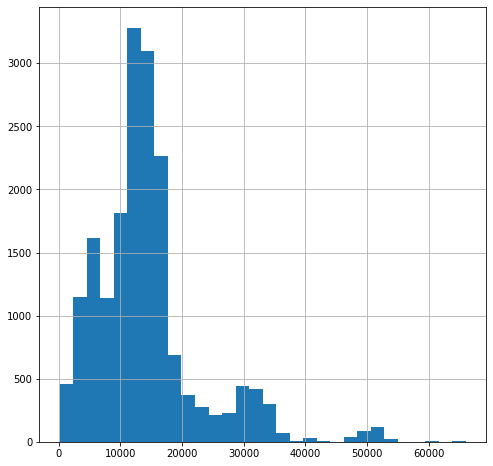

count    18139.000000
mean     14197.860742
std       8606.830295
min        181.000000
25%       9241.000000
50%      13105.000000
75%      16293.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

In [107]:
#расстояние до центра города в метрах
data['cityCenters_nearest'].hist(figsize = (8, 8), bins = 30, grid = True)
plt.show()
data['cityCenters_nearest'].describe()

Гистограмма имеет вид распределения Пуассона. Среднее значение расстояния от квартиры до центра составляет 14197.9 метров, а медиана равна 13105 метров. Большинство квартир располагается в 9241 - 16293 метрах от центра города.

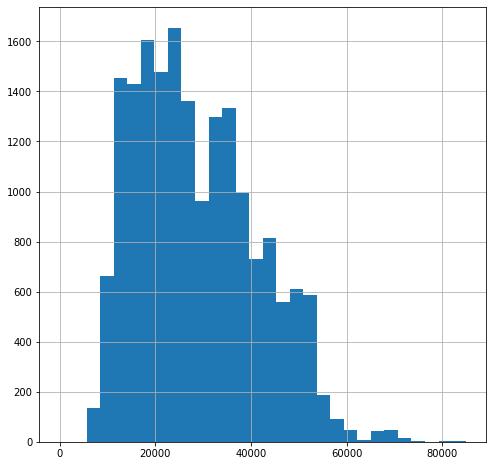

count    18116.000000
mean     28803.225878
std      12637.314144
min          0.000000
25%      18575.750000
50%      26756.500000
75%      37294.000000
max      84869.000000
Name: airports_nearest, dtype: float64

In [108]:
#расстояние до ближайшего аэропорта
data['airports_nearest'].hist(figsize = (8,8), bins = 30, grid = True)
plt.show()
data['airports_nearest'].describe()

Гистограмма имеет вид распределения Пуассона. Среднее значение расстояния от квартиры до аэропорта составляет 28803.2 метров, а медиана равна 26756.5 метров. Большинство квартир располагается в 18575.75 - 37294 метрах от аэропорта.

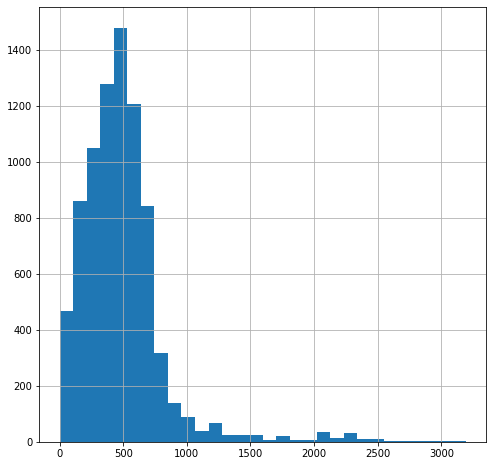

count    8064.000000
mean      490.830729
std       342.554386
min         1.000000
25%       288.000000
50%       454.500000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

In [109]:
#расстояние до ближайшего парка
data['parks_nearest'].hist(figsize = (8, 8), bins = 30, grid = True)
plt.show()
data['parks_nearest'].describe()

Гистограмма имеет вид распределения Пуассона. Среднее значение расстояния от квартиры до парка составляет 490.8 метров, а медиана равна 454.5 метров. Большинство квартир располагается в 288 - 612 метрах от парка.

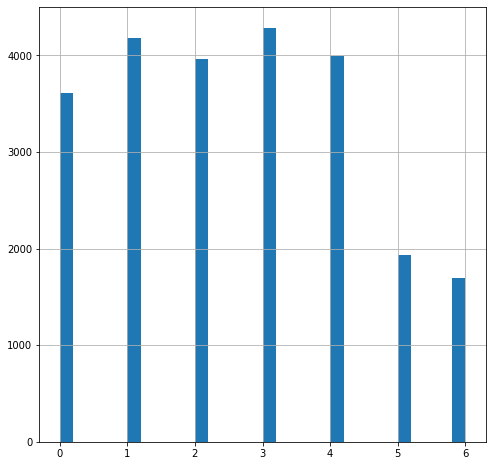

count    23650.000000
mean         2.568710
std          1.788808
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: day_exposition, dtype: float64


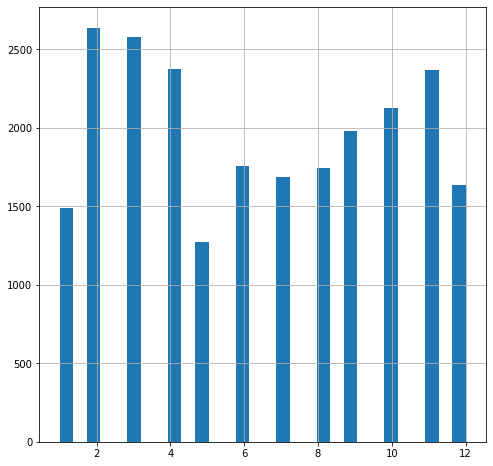

count    23650.000000
mean         6.401564
std          3.491418
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month_exposition, dtype: float64


In [110]:
#день и месяц публикации объявления
data['day_exposition'].hist(figsize = (8, 8), bins = 30, grid = True)
plt.show()
print(data['day_exposition'].describe())

data['month_exposition'].hist(figsize = (8, 8), bins = 30, grid = True)
plt.show()
print(data['month_exposition'].describe())

В большинстве случаев публикация объявления происходит во вторник и четверг, меньше всего в воскресенье. Также лидируют конец зимы - начало весны (февраль - март), а вот конец весны (май) является самым непопулярным месяцем для публикации объявлений.

а) Выполняем задание: "Изучите, как быстро продавались квартиры (столбец days_exposition)"

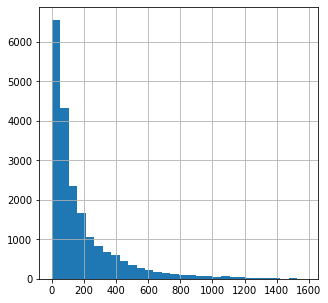

count    20470.000000
mean       180.753200
std        219.777916
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64


In [111]:
#строим гистрограмму
data['days_exposition'].hist(figsize = (5, 5), bins = 30, grid = True)
plt.show()
print(data['days_exposition'].describe())

Мы видим, что в среднем объявление "висит" 45 - 231 день. Можно сделать вывод, что быстрые продажи - это до 45 дней со дня выставления объявления до его снятия, средние продажи как раз от 45 до 231 дня и долгие продажи свыше 231 дней.
Создадим дополнительный столбец в датафрейме, где опишем период продажи квартир.

In [112]:
#описываем функцию
def sell_speed(data):
    try:
        if data['days_exposition'] < 45:
            return 'быстрая продажа'
        elif 45 <= data['days_exposition'] <= 231:
            return 'средняя скорость продажи'
        elif  data['days_exposition'] > 231 :
            return 'долгая продажа'
    except:
        pass
data['sell_speed'] = data.apply(sell_speed, axis = 1)
#выводим 5 первых строк датафрейма для проверки
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,one_meter_price,day_exposition,month_exposition,year_exposition,floor_type,cityCenters_nearest_km,sell_speed
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,2,755.0,<NA>,120370.370370,3,3,2019,другой,16.028,None
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,0,NaN,81,82920.792079,1,12,2018,первый,18.603,средняя скорость продажи
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,2,574.0,558,92785.714286,3,8,2015,другой,13.933,долгая продажа
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,NaN,9,False,...,3,234.0,424,408176.100629,4,7,2015,другой,6.800,долгая продажа
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,1,48.0,121,100000.000000,1,6,2018,другой,8.098,средняя скорость продажи


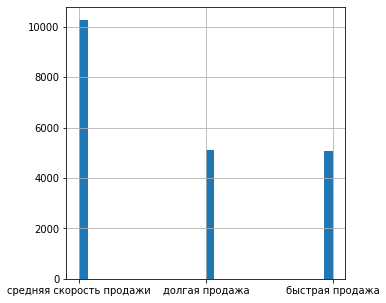

count                        20470
unique                           3
top       средняя скорость продажи
freq                         10271
Name: sell_speed, dtype: object


In [113]:
#строим новую гистограмму на основе полученных данных
data['sell_speed'].hist(figsize = (5, 5), bins = 30, grid = True)
plt.show()
print(data['sell_speed'].describe())

Быстрые и долгие продажи находятся почти на одном уровне, а вот средняя скорость продажи (45-231) лидируют, показывая почти вдвое большие результаты. Следовательно, выставляемые квартиры чаще всего продаются в период от 45 до 231 дня, после публикации объявления. 

б) Выполняем задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта?"

0.425437431007349

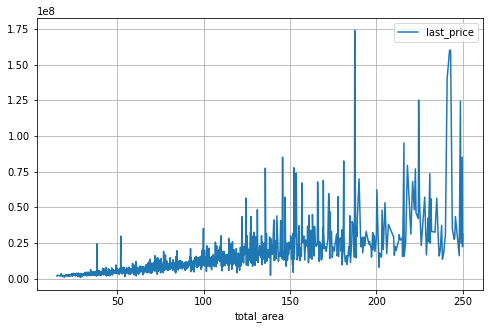

In [114]:
#зависимость цены last_price от общей площади total_area
data.pivot_table(index = 'total_area', values = 'last_price').plot(figsize = (8, 5), grid = True)
#посчитаем коэффициент корреляции пирсона
data['total_area'].corr(data['last_price'])

По графику можно заметить, что чем больше общая площадь квартиры, тем цена становится выше. Об этом свидетельствует и положительный коэффициент корреляции пирсона. Следовательно, можно сделать вывод, что рост общей площади квартиры будет сопровождаться ростом ее стоимости.

0.38298952376459733

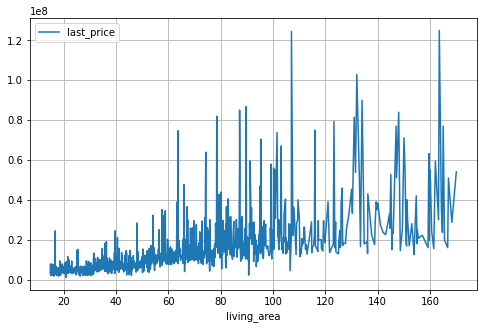

In [115]:
#зависимость цены last_price от жилой площади living_area
data.pivot_table(index = 'living_area', values = 'last_price').plot(figsize = (8, 5), grid = True)
#посчитаем коэффициент корреляции пирсона
data['living_area'].corr(data['last_price'])

По графику можно заметить, что чем больше жилая площадь квартиры, тем цена становится понемногу выше. Об этом свидетельствует и положительный коэффициент корреляции пирсона. Следовательно, можно сделать вывод, что рост жилой площади квартиры будет сопровождаться ростом ее стоимости.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23650 entries, 0 to 23649
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            23650 non-null  int64         
 1   last_price              23650 non-null  float64       
 2   total_area              23650 non-null  float64       
 3   first_day_exposition    23650 non-null  datetime64[ns]
 4   rooms                   23650 non-null  int64         
 5   ceiling_height          23650 non-null  float64       
 6   floors_total            23565 non-null  Int64         
 7   living_area             21752 non-null  float64       
 8   floor                   23650 non-null  int64         
 9   is_apartment            23650 non-null  bool          
 10  studio                  23650 non-null  bool          
 11  open_plan               23650 non-null  bool          
 12  kitchen_area            21381 non-null  float6

0.42451646165570267

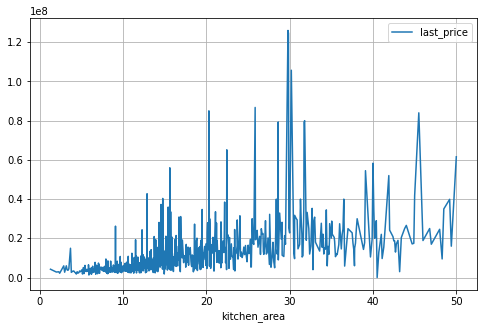

In [116]:
#зависимость цены last_price от площади кухни kitchen_area
print(data.info())
data.pivot_table(index = 'kitchen_area', values = 'last_price').plot(figsize = (8, 5), grid = True)
#посчитаем коэффициент корреляции пирсона
data['kitchen_area'].corr(data['last_price'])

По графику можно заметить, что чем площадь кухни в квартире, тем цена становится понемногу выше. Об этом свидетельствует и положительный коэффициент корреляции пирсона. Следовательно, можно сделать вывод, что рост площади кухни в квартире будет сопровождаться ростом ее стоимости.

0.36342062218770704

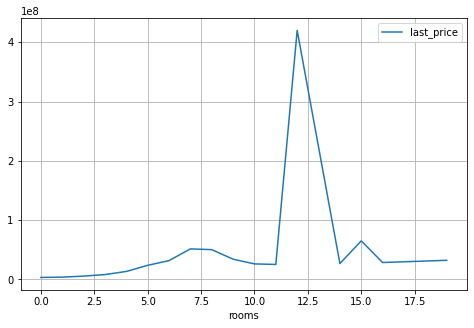

In [55]:
#зависимость цены last price от количесвта комнат в квартире rooms
data.pivot_table(index = 'rooms', values = 'last_price').plot(figsize = (8, 5), grid = True)
#посчитаем коэффициент корреляции пирсона
data['rooms'].corr(data['last_price'])

Положительный коэффициент корреляции пирсона свидетельствует о том, что чем больше в квартире комнат, тем цена будет выше.

<AxesSubplot:xlabel='floor_type'>

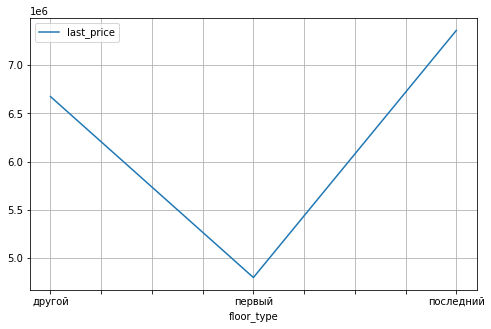

In [56]:
#зависимость цены last_price от типа этажа, на котором расположена квартира floor_type
data.pivot_table(index = 'floor_type', values = 'last_price').plot(figsize = (8, 5), grid = True)

По графику можно заметить и сделать вывод, что чем выше этаж квартиры, тем цена выше.

<AxesSubplot:xlabel='first_day_exposition'>

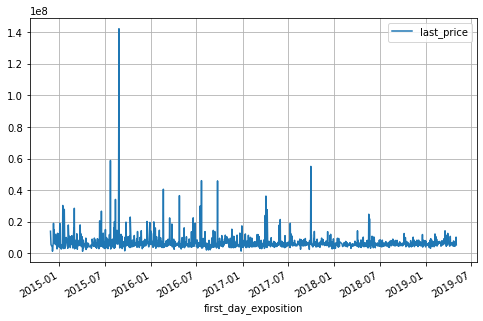

In [57]:
#зависимость цены last_price от даты размещения first_day_exposition
data.pivot_table(index = 'first_day_exposition', values = 'last_price').plot(figsize = (8, 5), grid = True)

По графику не заметно влияния даты размещения объявления на цену квартиры.

Итак, полученнные нами зависимости цены от:
- общей площади - 0.425
- жилой площади - 0.38
- площади кухни - 0.424
- количество комнат - 0.363

Можно сделать вывод, что наибольшее влияние на цену квартиры влияет ее общая площадь, а наименьшее - площадь кухни. Также высокие этажи наиболее дорогие, а вот дата размещения объявления ни на что не влияет.

в) Выполняем задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце locality_name."

In [58]:
#10 населённых пунктов с наибольшим числом объявлений
data.value_counts('locality_name').head(10)

locality_name
Санкт-Петербург      15721
поселок Мурино         556
поселок Шушары         440
Всеволожск             398
Пушкин                 369
Колпино                338
поселок Парголово      327
Гатчина                307
деревня Кудрово        299
Выборг                 237
dtype: int64

In [59]:
#создаем сводную таблицу по locality_name и ранее подсчитанному столбцу one_meter_price, сортируя по убыванию и выводим топ-10
meter_price_top = data.pivot_table(index = 'locality_name', values = 'one_meter_price', aggfunc = ['count', 'mean']).sort_values(by = ('count', 'one_meter_price'), ascending = False)
meter_price_top.head(10)

,count,mean
,one_meter_price,one_meter_price
locality_name,,
Санкт-Петербург,15721,124018.268317
поселок Мурино,556,85681.762601
поселок Шушары,440,78677.364217
Всеволожск,398,68654.473986
Пушкин,369,106584.801682
Колпино,338,77209.870028
поселок Парголово,327,90175.913458
Гатчина,307,68746.146763


Делаем вывод, что с самой высокой ценой одного квадратного метра из 10 населённых пунктов с наибольшим числом объявлений является Санкт-Петербург, а с самой низкой стоимостью квадратного метра - Выборг

г) Выполняем задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."

In [60]:
#создадим новый столбец в датафрейме, чтобы вычислить цену км до центра
data['cityCenters_km_price'] = data['last_price'] / data['cityCenters_nearest_km']
#высчитываем среднее значение
km_price_spb = data.query('locality_name == "Санкт-Петербург" and (cityCenters_nearest_km != 0)')
km_price_spb['cityCenters_km_price'].mean()

1519442.2231346935

-0.20688702501498762

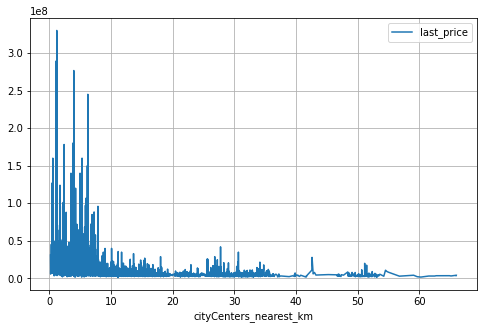

In [61]:
#строим график и считаем коэффициент пирсона для выявления зависимости
data.pivot_table(index = 'cityCenters_nearest_km', values = 'last_price').plot(figsize = (8, 5), grid = True)
data['cityCenters_nearest_km'].corr(data['last_price'])

Цена 1 км в среднем стоит до центра стоит около 1.5 млн По графику и по коэфициенту пирсона заметно, что чем ближе к центру, тем цена за квартиру выше и чем дальше, тем цена ниже. 

### Общий вывод

В ходе проведенной работы с данными была определены пропущенные значения, заполнены пропущенные значения, где это возможно и необходимо, изменены типы данных для более удобной работы, устранены неявные дубликаты в названиях населенных пунктов, устранены редкие и выбивающиеся значения в столбцах. Также посчитали и добавили в таблицу цену квадратного метра жилья, вывели из даты дни недели, месяцы и года размещения объявлений, добавили категории по этажам квартир и подсчитали расстояние в км до центра города. 
Мы выявили, что в большинстве квартиры располагающиеся на 2 - 8 этажах в 5 - 16 этажных домах и имеют общую площадь 40 - 69 кв метров, где жилая площадь составляет 19 - 42 кв метров, имеют 1 - 3 комнаты, а площадь кухни 7 - 12 кв метров. Средняя высота потолков 2.6 - 2.7 метров. В основном квартиры имеют цену в диапазоне 3.4 - 6.7 млн и располагаются в 9241 - 16293 метрах от центра города, в 18575.75 - 37294 метрах от аэропорта, в 288 - 612 метрах от парка. Продаются квартиры в период от 45 до 231 дней. Наиболее часто бъявления выставляются в  конце зимы - начало весны (февраль - март), а вот конец весны (май) является самым непопулярным месяцем для публикации объявлений. Можно также утверждать и том, что рост общей площади квартиры, рост жилой площади, рост площади кухни будет сопровождаться ростом стоимости объекта. А также чем больше в квартире комнат, чем выше этаж квартиры,чем ближа она к центру, тем цена будет выше. Нибольшее влияние на цену квартиры влияет ее общая площадь, а наименьшее - площадь кухни. Также высокие этажи наиболее дорогие, а вот дата размещения объявления ни на что не влияет. Самой высокой ценой одного квадратного метра из 10 населённых пунктов с наибольшим числом объявлений является Санкт-Петербург, а с самой низкой стоимостью квадратного метра - Выборг.